## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\siram\OneDrive\Desktop\data uefa'

In [6]:
path

'C:\\Users\\siram\\OneDrive\\Desktop\\data uefa'

In [34]:

df=pd.read_csv(os.path.join(path,'goals_2.csv'), index_col = False)

In [35]:
df.shape

(183, 11)

In [36]:
df.head()

,no,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,year
0,1,15,11,1,3,0,13,2,3,12,2021
1,2,13,8,3,1,1,13,0,3,10,2019
2,3,11,3,4,3,1,11,0,1,8,2022
3,4,8,0,8,0,0,7,1,1,13,2020
4,5,7,3,1,3,0,7,0,0,6,2019


### 2. The elbow technique

In [37]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [38]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\siram\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-110544.14207650283,
 -18499.62312312313,
 -5450.615186615186,
 -3058.186086086084,
 -2580.7957530486888,
 -2193.849439775912,
 -1835.4968531468546,
 -1586.398819042367,
 -1398.4062720595084]

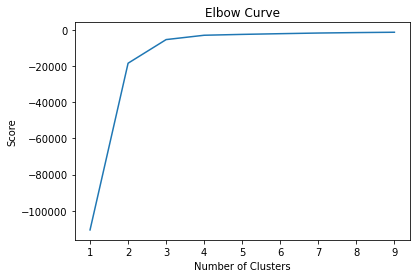

In [39]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [40]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [41]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\siram\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [42]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\siram\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [43]:
df.head()

,no,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,year,clusters
0,1,15,11,1,3,0,13,2,3,12,2021,1
1,2,13,8,3,1,1,13,0,3,10,2019,1
2,3,11,3,4,3,1,11,0,1,8,2022,1
3,4,8,0,8,0,0,7,1,1,13,2020,1
4,5,7,3,1,3,0,7,0,0,6,2019,1


In [44]:
df['clusters'].value_counts()

0    111
1     42
2     30
Name: clusters, dtype: int64

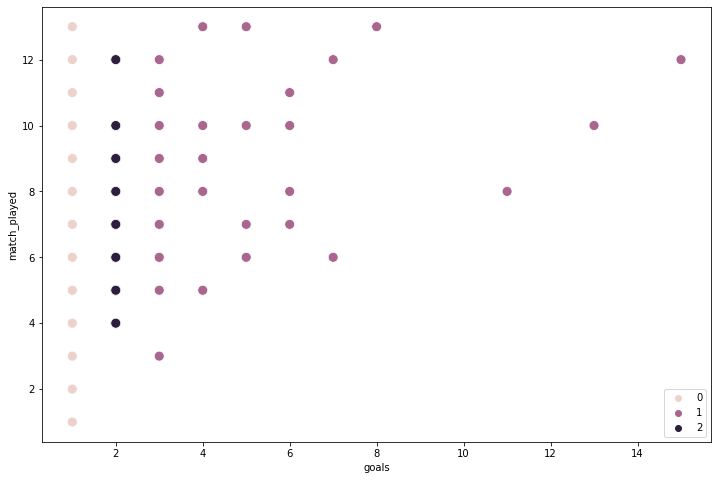

In [53]:
# Plot the clusters for the "match played" and "goals" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['goals'], y=df['match_played'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('goals') # Label x-axis.
plt.ylabel('match_played') # Label y-axis.
plt.show()

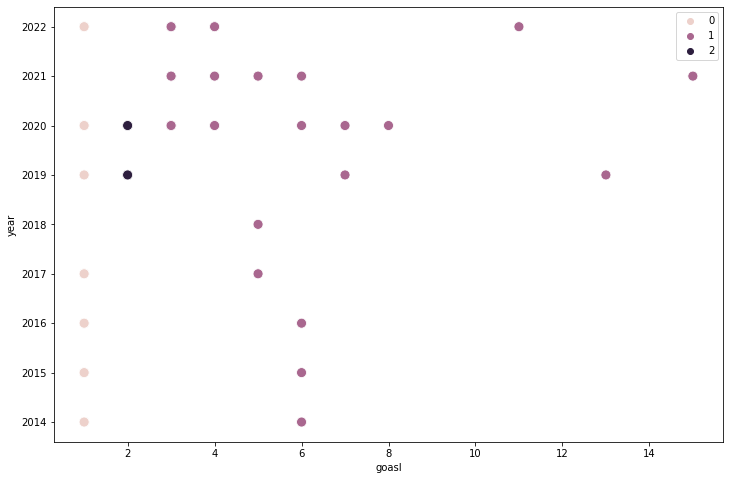

In [50]:
# Plot the clusters for the "goals" and "year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['goals'], y=df['year'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('goasl') 
plt.ylabel('year') 
plt.show()

In [51]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [52]:
df.groupby('cluster').agg({'goals':['mean', 'median'], 
                         'right_foot':['mean', 'median'], 
                         'left_foot':['mean', 'median'],
                          'headers':['mean', 'median']})

goals        right_foot        left_foot          headers  \
                 mean median       mean median      mean median      mean   
cluster                                                                     
dark purple  2.000000    2.0   0.866667    1.0  0.700000    1.0  0.400000   
pink         1.000000    1.0   0.513514    1.0  0.279279    0.0  0.198198   
purple       4.738095    4.0   2.261905    2.0  1.785714    1.0  0.619048   

                    
            median  
cluster             
dark purple    0.0  
pink           0.0  
purple         0.0